## Mounting Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Importing Necessary Libraries

In [0]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from os import listdir
from os.path import isfile, join

# Preparing Data

### Musical Aptitude Scores

In [0]:
import pandas as pd
xls = pd.ExcelFile('/content/gdrive/My Drive/fMRIdataset_demographics77.xlsx')
df1 = pd.read_excel(xls, "77")
df2 = pd.read_excel(xls, "Seashore")

file_name = {}
cnt = 0
for i in df1['name.MAT']:
  file_name[df1['#'][cnt]] = i
  cnt += 1

Dict = {}
cnt = 0
for i in df2['Unnamed: 0']:
  try:
    m = (df2['Unnamed: 1'][cnt] + df2['Unnamed: 2'][cnt])/2
    Dict[file_name[i]] = [df2['Unnamed: 1'][cnt], df2['Unnamed: 2'][cnt], m]
  except:
    pass
  cnt +=1
print(Dict)
print(len(Dict))

{'mus22_': [49, 45, 47.0], 'nonmus22_': [38, 0, 19.0], 'nonmus25_': [36, 46, 41.0], 'nonmus26_': [42, 37, 39.5], 'nonmus27_': [42, 45, 43.5], 'nonmus29_': [0, 0, 0.0], 'mus25_': [47, 47, 47.0], 'nonmus30_': [23, 23, 23.0], 'nonmus32_': [49, 44, 46.5], 'nonmus01_': [33, 41, 37.0], 'mus03_': [49, 47, 48.0], 'mus04_': [34, 39, 36.5], 'mus05_': [49, 47, 48.0], 'nonmus02_': [33, 43, 38.0], 'nonmus03_': [46, 47, 46.5], 'mus07_': [47, 48, 47.5], 'nonmus36_': [37, 41, 39.0], 'mus08_': [50, 46, 48.0], 'mus09_': [48, 41, 44.5], 'nonmus05_': [43, 45, 44.0], 'nonmus06_': [13, 0, 6.5], 'mus10_': [50, 48, 49.0], 'mus26_': [42, 46, 44.0], 'nonmus43_': [41, 41, 41.0], 'nonmus45_': [48, 46, 47.0], 'nonmus46_': [30, 42, 36.0], 'nonmus47_': [48, 40, 44.0], 'nonmus51_': [40, 44, 42.0], 'nonmus09_': [43, 40, 41.5], 'mus24_': [48, 46, 47.0], 'mus13_': [46, 40, 43.0], 'mus14_': [48, 45, 46.5], 'mus15_': [50, 43, 46.5], 'mus16_': [50, 41, 45.5], 'mus17_': [48, 39, 43.5], 'nonmus12_': [47, 43, 45.0], 'nonmus13

### fMRI Data

In [0]:
MusDataDir = ('/content/gdrive/My Drive/Piazzolla/Mus/')
subject_files_mus = [f for f in listdir(MusDataDir) if isfile(join(MusDataDir, f))]
print('No. of Mus: ', len(subject_files_mus))

NonMusDataDir = ('/content/gdrive/My Drive/Piazzolla/NonMus/')
subject_files_nonmus = [f for f in listdir(NonMusDataDir) if isfile(join(NonMusDataDir, f))]
print('No. of NonMus: ', len(subject_files_nonmus))

print('Total no. of subjects: ', len(subject_files_mus) + len(subject_files_nonmus))

No. of Mus:  17
No. of NonMus:  21
Total no. of subjects:  38


In [0]:
atlasesDir = ('/content/gdrive/My Drive/')
# AALAtlas = atlasesDir + 'MARSBARlookup.mat'
craddockAtlas = atlasesDir + 'marsbar_2d.mat'
atlas = loadmat(craddockAtlas)
print(atlas)
print(atlas['ROI_nos_2D'].shape)
print(len(np.unique(atlas['ROI_nos_2D'])))
# print(min(atlas['ROI_nos']), max(atlas['ROI_nos']))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Apr 26 01:31:20 2020', '__version__': '1.0', '__globals__': [], 'ROI_nos_2D': array([[ 0],
       [ 0],
       [ 0],
       ...,
       [82],
       [82],
       [75]], dtype=uint8)}
(228453, 1)
117


In [0]:
atlas

{'ROI_nos_2D': array([[ 0],
        [ 0],
        [ 0],
        ...,
        [82],
        [82],
        [75]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Apr 26 01:31:20 2020',
 '__version__': '1.0'}

Mus Data

In [0]:
data_mus = []
df_atlas = pd.DataFrame(atlas['ROI_nos_2D'])
dataDir = MusDataDir
subject_files = subject_files_mus

for file in subject_files:
  print(file)
  fmri = pd.DataFrame(loadmat(dataDir + file)['fmri'])
  craddock = []
  for i in range(0,951):
    if len(df_atlas[df_atlas[0] == i]) > 0:
      # print(i)
      craddock.append(fmri.loc[df_atlas[df_atlas[0] == i].index].mean(skipna=True))      
  data_mus.append(craddock)

print(len(data_mus), len(data_mus[0]), len(data_mus[0][0]))

mus17_piazz.mat
mus26_piazz.mat
mus25_piazz.mat
mus24_piazz.mat
mus22_piazz.mat
mus19_piazz.mat
mus03_piazz.mat
mus04_piazz.mat
mus05_piazz.mat
mus10_piazz.mat
mus07_piazz.mat
mus13_piazz.mat
mus14_piazz.mat
mus08_piazz.mat
mus09_piazz.mat
mus15_piazz.mat
mus16_piazz.mat
17 117 244


NonMus Data

In [0]:
data_nonmus = []
df_atlas = pd.DataFrame(atlas['ROI_nos_2D'])
dataDir = NonMusDataDir
subject_files = subject_files_nonmus

for file in subject_files:
  print(file)
  fmri = pd.DataFrame(loadmat(dataDir + file)['fmri'])
  craddock = []
  for i in range(0,951):
    if len(df_atlas[df_atlas[0] == i]) > 0:
      # print(i)
      craddock.append(fmri.loc[df_atlas[df_atlas[0] == i].index].mean(skipna=True))      
  data_nonmus.append(craddock)

print(len(data_nonmus), len(data_nonmus[0]), len(data_nonmus[0][0]))

nonmus51_piazz.mat
nonmus47_piazz.mat
nonmus46_piazz.mat
nonmus45_piazz.mat
nonmus43_piazz.mat
nonmus36_piazz.mat
nonmus32_piazz.mat
nonmus30_piazz.mat
nonmus29_piazz.mat
nonmus01_piazz.mat
nonmus02_piazz.mat
nonmus03_piazz.mat
nonmus05_piazz.mat
nonmus06_piazz.mat
nonmus09_piazz.mat
nonmus12_piazz.mat
nonmus13_piazz.mat
nonmus22_piazz.mat
nonmus25_piazz.mat
nonmus26_piazz.mat
nonmus27_piazz.mat
21 117 244


In [0]:
regions = ['','Amygdala (L)',
'Amygdala (R)',
'Angular gyrus (L)',
'Angular gyrus (R)',
'Calcarine fissure and surrounding cortex (L)',
'Calcarine fissure and surrounding cortex (R)',
'Caudate nucleus (L)',
'Caudate nucleus (R)',
'Lobule X of cerebellum (L)',
'Lobule X of cerebellum (R)',
'Lobule III of cerebellum (L)',
'Lobule III of cerebellum (R)',
'Lobules IV-V of cerebellum (L)',
'Lobules IV-V of cerebellum (R)',
'Lobule VI of cerebellum (L)',
'Lobule VI of cerebellum (R)',
'Lobule VIIB of cerebellum (L)',
'Lobule VIIB of cerebellum (R)',
'Lobule VIII of cerebellum (L)',
'Lobule VIII of cerebellum (R)',
'Lobule IX of cerebellum (L)',
'Lobule IX of cerebellum (R)',
'Crus I of cerebellum (L)',
'Crus I of cerebellum (R)',
'Crus II of cerebellum (L)',
'Crus II of cerebellum (R)',
'Anterior cingulate and paracingulate gyrus (L)',
'Anterior cingulate and paracingulate gyrus (R)',
'Median cingulate and paracingulate gyrus (L)',
'Median cingulate and paracingulate gyrus (R)',
'Posterior cingulate and paracingulate gyrus (L)',
'Posterior cingulate and paracingulate gyrus (R)',
'Cuneus (L)',
'Cuneus (R)',
'Inferior frontal gyrus, opercular part (L)',
'Inferior frontal gyrus, opercular part (R)',
'Inferior frontal gyrus, orbital part (L)',
'Inferior frontal gyrus, orbital part (R)',
'Inferior frontal gyrus, triangular part (L)',
'Inferior frontal gyrus, triangular part (R)',
'Inferior frontal gyrus, medial orbital (L)',
'Inferior frontal gyrus, medial orbital (R)',
'Middle frontal gyrus (L)',
'Middle frontal gyrus, orbital part (L)',
'Middle frontal gyrus, orbital part (R)',
'Middle frontal gyrus (R)',
'Superior frontal gyrus (L) ',
'Superior frontal gyrus, medial (L)',
'Superior frontal gyrus, medial (R)',
'Superior frontal gyrus, orbital part (L)',
'Superior frontal gyrus, orbital part (R)',
'Superior frontal gyrus (R)',
'Fusiform gyrus (L)',
'Fusiform gyrus (R)',
'Heschl''s gyrus (L)',
'Heschl''s gyrus (R)',
'Hippocampus (L)',
'Hippocampus (R)',
'Insula (L)',
'Insula (R)',
'Lingual gyrus (L)',
'Lingual gyrus (R)',
'Inferior occipital gyrus (L)',
'Inferior occipital gyrus (R)',
'Middle occipital gyrus (L)',
'Middle occipital gyrus (R)',
'Superior occipital gyrus (L)',
'Superior occipital gyrus (R)',
'Olfactory cortex (L)',
'Olfactory cortex (R)',
'Globus pallidus (L)',
'Globus pallidus (R)',
'Parahippocampal gyrus (L)',
'Parahippocampal gyrus (R)',
'Paracentral lobule (L)',
'Paracentral lobule (R)',
'Inferior parietal, but supramarginal and angular gyri (L)',
'Inferior parietal, but supramarginal and angular gyri (R)',
'Superior parietal gyrus (L)',
'Superior parietal gyrus (R)',
'Postcentral gyrus (L)',
'Postcentral gyrus (R)',
'Precentral gyrus (L)',
'Precentral gyrus (R)',
'Precuneus (L)',
'Precuneus (R)',
'Putamen (L)',
'Putamen (R)',
'Gyrus rectus (L)',
'Gyrus rectus (R)',
'Rolandic operculum (L)',
'Rolandic operculum (R)',
'Supplementary motor area (L)',
'Supplementary motor area (R)',
'Supramarginal gyrus (L)',
'Supramarginal gyrus (R)',
'Inferior temporal gyrus (L)',
'Inferior temporal gyrus (R)',
'Middle temporal gyrus (L)',
'Middle temporal gyrus (R)',
'Temporal pole, middle temporal gyrus (L)',
'Temporal pole, middle temporal gyrus (R)',
'Temporal pole, superior temporal gyrus (L)',
'Temporal pole, superior temporal gyrus (R)',
'Superior temporal gyrus (L)',
'Superior temporal gyrus (R)',
'Thalamus (L)',
'Thalamus (R)',
'Vermis X of cerebellum',
'Vermis I-II of cerebellum',
'Vermis III of cerebellum',
'Vermis IV-V of cerebellum',
'Vermis VI of cerebellum',
'Vermis VII of cerebellum',
'Vermis VIII of cerebellum',
'Vermis IX of cerebellum']
print(len(regions))

117


In [0]:
from collections import OrderedDict
import operator

data_mus = np.array(data_mus)
freq = {}
for h in range(0,200):
  freq[h] = 0
for i in data_mus:
  v = np.var(i, axis=1)
  c = 0
  for j in v:
    c += 1
    if(j>1):
      freq[c] = freq[c] + 1

d = freq
d_descending = OrderedDict(sorted(d.items(), reverse=True))
# print(d_descending)
cd = sorted(d.items(),key=operator.itemgetter(1),reverse=True)
print(cd)

[(49, 13), (42, 11), (35, 10), (50, 10), (79, 10), (5, 9), (34, 9), (65, 9), (76, 9), (81, 9), (86, 9), (4, 8), (43, 8), (44, 8), (77, 8), (80, 8), (82, 8), (87, 8), (6, 7), (69, 7), (83, 7), (85, 7), (94, 7), (97, 7), (25, 6), (47, 6), (48, 6), (53, 6), (57, 6), (63, 6), (78, 6), (95, 6), (105, 6), (106, 6), (7, 5), (24, 5), (56, 5), (62, 5), (68, 5), (84, 5), (96, 5), (104, 5), (26, 4), (28, 4), (30, 4), (36, 4), (37, 4), (40, 4), (45, 4), (46, 4), (64, 4), (67, 4), (115, 4), (27, 3), (31, 3), (38, 3), (41, 3), (66, 3), (90, 3), (93, 3), (107, 3), (114, 3), (116, 3), (2, 2), (10, 2), (17, 2), (32, 2), (39, 2), (51, 2), (52, 2), (61, 2), (91, 2), (92, 2), (101, 2), (111, 2), (112, 2), (3, 1), (8, 1), (9, 1), (13, 1), (14, 1), (15, 1), (16, 1), (18, 1), (19, 1), (29, 1), (33, 1), (54, 1), (55, 1), (60, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (88, 1), (89, 1), (98, 1), (99, 1), (100, 1), (102, 1), (103, 1), (108, 1), (109, 1), (110, 1), (113, 1), (117, 1), (0, 0), (1, 

In [0]:
import matplotlib.pyplot as plt

final_mus = {}
for i,j in cd:
  if(i<117):
    final_mus[regions[i]] = j

# plt.bar(final_mus.keys(), final_mus.values(),  color='g')
print(final_mus)

{'Superior frontal gyrus, medial (R)': 13, 'Inferior frontal gyrus, medial orbital (R)': 11, 'Inferior frontal gyrus, opercular part (L)': 10, 'Superior frontal gyrus, orbital part (L)': 10, 'Superior parietal gyrus (L)': 10, 'Calcarine fissure and surrounding cortex (L)': 9, 'Cuneus (R)': 9, 'Middle occipital gyrus (L)': 9, 'Paracentral lobule (R)': 9, 'Postcentral gyrus (L)': 9, 'Precuneus (R)': 9, 'Angular gyrus (R)': 8, 'Middle frontal gyrus (L)': 8, 'Middle frontal gyrus, orbital part (L)': 8, 'Inferior parietal, but supramarginal and angular gyri (L)': 8, 'Superior parietal gyrus (R)': 8, 'Postcentral gyrus (R)': 8, 'Putamen (L)': 8, 'Calcarine fissure and surrounding cortex (R)': 7, 'Olfactory cortex (L)': 7, 'Precentral gyrus (L)': 7, 'Precuneus (L)': 7, 'Supplementary motor area (R)': 7, 'Inferior temporal gyrus (L)': 7, 'Crus II of cerebellum (L)': 6, 'Superior frontal gyrus (L) ': 6, 'Superior frontal gyrus, medial (L)': 6, 'Fusiform gyrus (L)': 6, 'Hippocampus (L)': 6, 'Inf

In [0]:
data_nonmus = np.array(data_nonmus)
freq = {}
for h in range(0,200):
  freq[h] = 0
for i in data_nonmus:
  v = np.var(i, axis=1)
  c = 0
  for j in v:
    c += 1
    if(j>1):
      freq[c] = freq[c] + 1

d = freq
cd = sorted(d.items(),key=operator.itemgetter(1),reverse=True)
print(cd)

[(81, 13), (5, 11), (49, 9), (50, 9), (79, 9), (80, 9), (4, 8), (34, 8), (86, 8), (87, 7), (35, 6), (42, 6), (68, 6), (77, 6), (94, 6), (97, 6), (46, 5), (69, 5), (6, 4), (44, 4), (47, 4), (48, 4), (65, 4), (78, 4), (95, 4), (105, 4), (43, 3), (64, 3), (67, 3), (83, 3), (111, 3), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (37, 2), (39, 2), (66, 2), (82, 2), (107, 2), (7, 1), (10, 1), (11, 1), (31, 1), (36, 1), (40, 1), (41, 1), (45, 1), (53, 1), (57, 1), (62, 1), (63, 1), (76, 1), (85, 1), (93, 1), (96, 1), (101, 1), (103, 1), (104, 1), (106, 1), (0, 0), (1, 0), (2, 0), (3, 0), (8, 0), (9, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (29, 0), (30, 0), (32, 0), (33, 0), (38, 0), (51, 0), (52, 0), (54, 0), (55, 0), (56, 0), (58, 0), (59, 0), (60, 0), (61, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (75, 0), (84, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (98, 0), (99, 0), (100, 0), (102, 0), (108, 0), (109, 0

In [0]:
final_nonmus = {}
for i,j in cd:
  if(i<117):
    final_nonmus[regions[i]] = j

print(final_nonmus)

{'Postcentral gyrus (L)': 13, 'Calcarine fissure and surrounding cortex (L)': 11, 'Superior frontal gyrus, medial (R)': 9, 'Superior frontal gyrus, orbital part (L)': 9, 'Superior parietal gyrus (L)': 9, 'Superior parietal gyrus (R)': 9, 'Angular gyrus (R)': 8, 'Cuneus (R)': 8, 'Precuneus (R)': 8, 'Putamen (L)': 7, 'Inferior frontal gyrus, opercular part (L)': 6, 'Inferior frontal gyrus, medial orbital (R)': 6, 'Superior occipital gyrus (R)': 6, 'Inferior parietal, but supramarginal and angular gyri (L)': 6, 'Supplementary motor area (R)': 6, 'Inferior temporal gyrus (L)': 6, 'Middle frontal gyrus (R)': 5, 'Olfactory cortex (L)': 5, 'Calcarine fissure and surrounding cortex (R)': 4, 'Middle frontal gyrus, orbital part (L)': 4, 'Superior frontal gyrus (L) ': 4, 'Superior frontal gyrus, medial (L)': 4, 'Middle occipital gyrus (L)': 4, 'Inferior parietal, but supramarginal and angular gyri (R)': 4, 'Supramarginal gyrus (L)': 4, 'Superior temporal gyrus (L)': 4, 'Middle frontal gyrus (L)':

In [0]:
from collections import Counter
final_dict = dict(Counter(final_mus)+Counter(final_nonmus))

print(final_dict)

{'Superior frontal gyrus, medial (R)': 22, 'Inferior frontal gyrus, medial orbital (R)': 17, 'Inferior frontal gyrus, opercular part (L)': 16, 'Superior frontal gyrus, orbital part (L)': 19, 'Superior parietal gyrus (L)': 19, 'Calcarine fissure and surrounding cortex (L)': 20, 'Cuneus (R)': 17, 'Middle occipital gyrus (L)': 13, 'Paracentral lobule (R)': 10, 'Postcentral gyrus (L)': 22, 'Precuneus (R)': 17, 'Angular gyrus (R)': 16, 'Middle frontal gyrus (L)': 11, 'Middle frontal gyrus, orbital part (L)': 12, 'Inferior parietal, but supramarginal and angular gyri (L)': 14, 'Superior parietal gyrus (R)': 17, 'Postcentral gyrus (R)': 10, 'Putamen (L)': 15, 'Calcarine fissure and surrounding cortex (R)': 11, 'Olfactory cortex (L)': 12, 'Precentral gyrus (L)': 10, 'Precuneus (L)': 8, 'Supplementary motor area (R)': 13, 'Inferior temporal gyrus (L)': 13, 'Crus II of cerebellum (L)': 8, 'Superior frontal gyrus (L) ': 10, 'Superior frontal gyrus, medial (L)': 10, 'Fusiform gyrus (L)': 7, 'Hippo

For musicians


<BarContainer object of 9 artists>

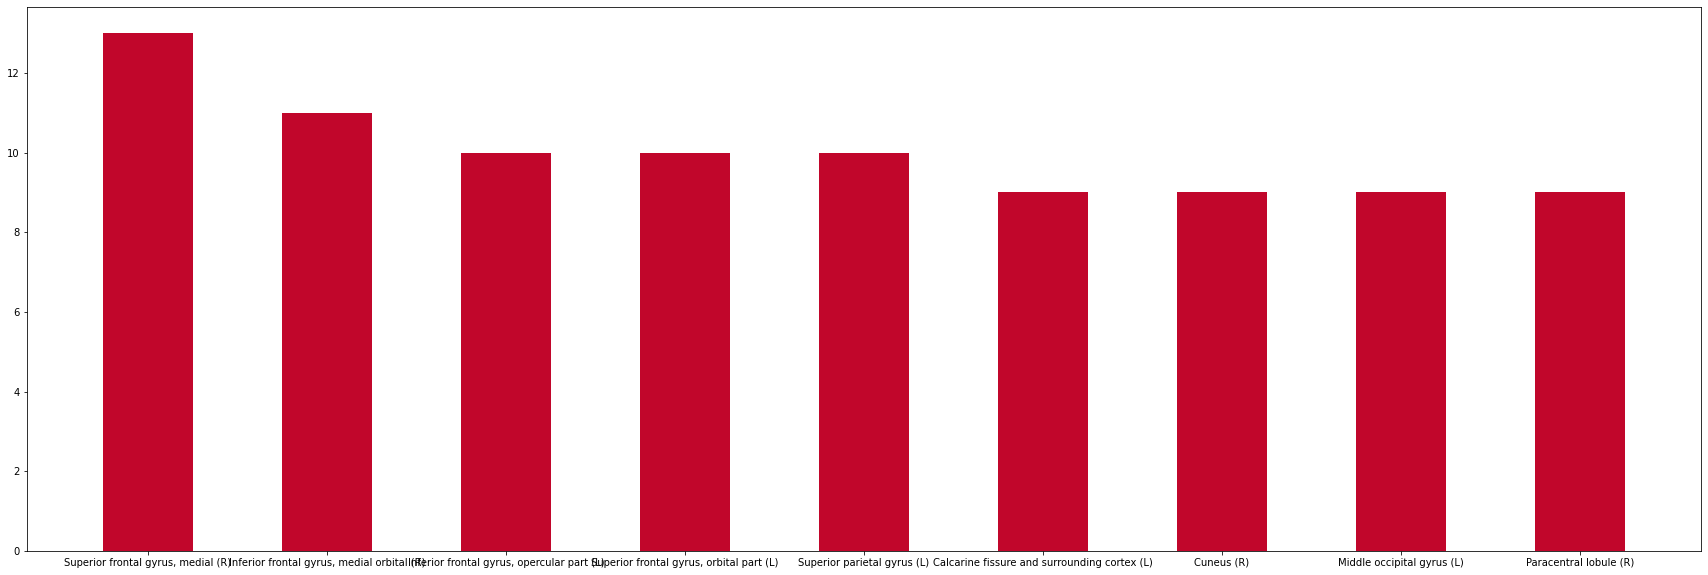

In [0]:
import matplotlib.pyplot as plt

cd2 = sorted(final_mus.items(),key=operator.itemgetter(1),reverse=True)
cd2 = cd2[0:9]
# print(cd2)
newdict = {}
for i,j in cd2:
    newdict[i]=j

plt.figure(figsize=(30,10))
print("For musicians")
plt.bar(newdict.keys(), newdict.values(),0.5, color='#C1062B')

For non-musicians


<BarContainer object of 9 artists>

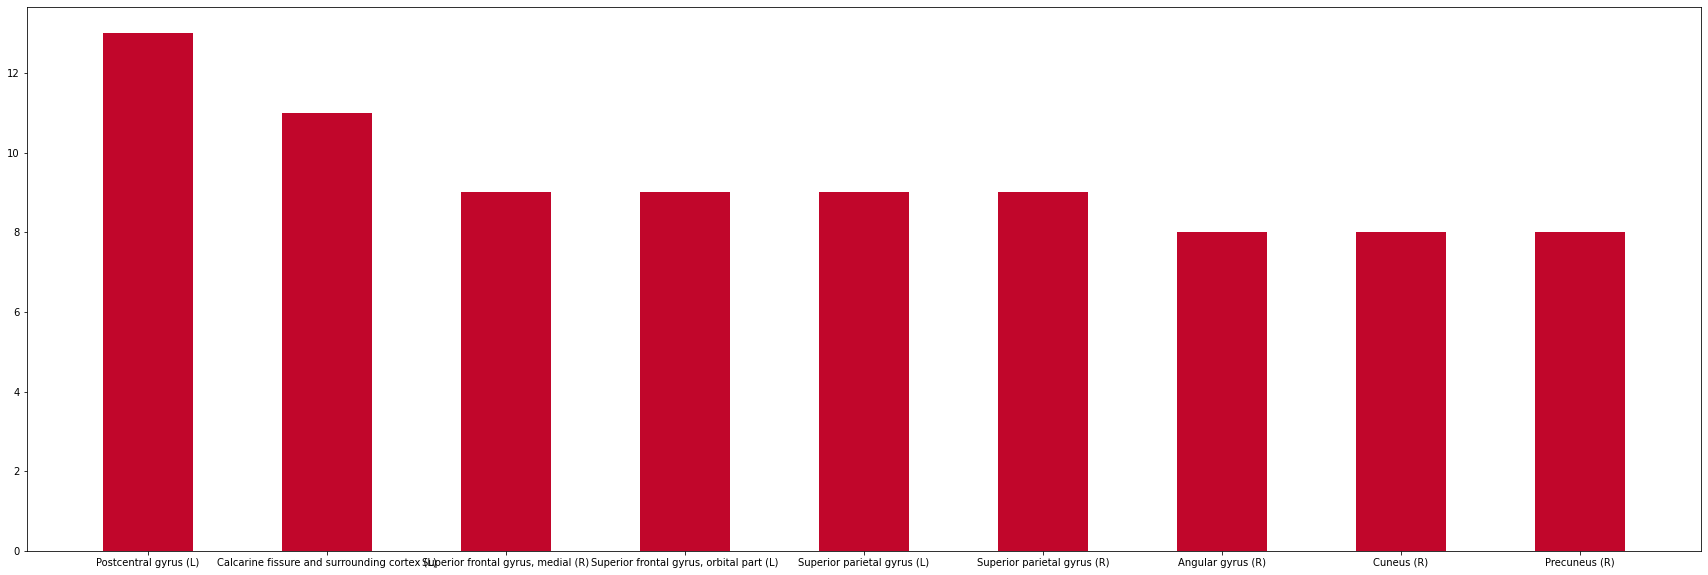

In [0]:
cd3 = sorted(final_nonmus.items(),key=operator.itemgetter(1),reverse=True)
cd3 = cd3[0:9]
# print(cd3)
newdict2 = {}
for i,j in cd3:
    newdict2[i]=j
# print(newdict2)

plt.figure(figsize=(30,10))
print("For non-musicians")
plt.bar(newdict2.keys(), newdict2.values(),0.5, color='#C1062B')

For all


<BarContainer object of 9 artists>

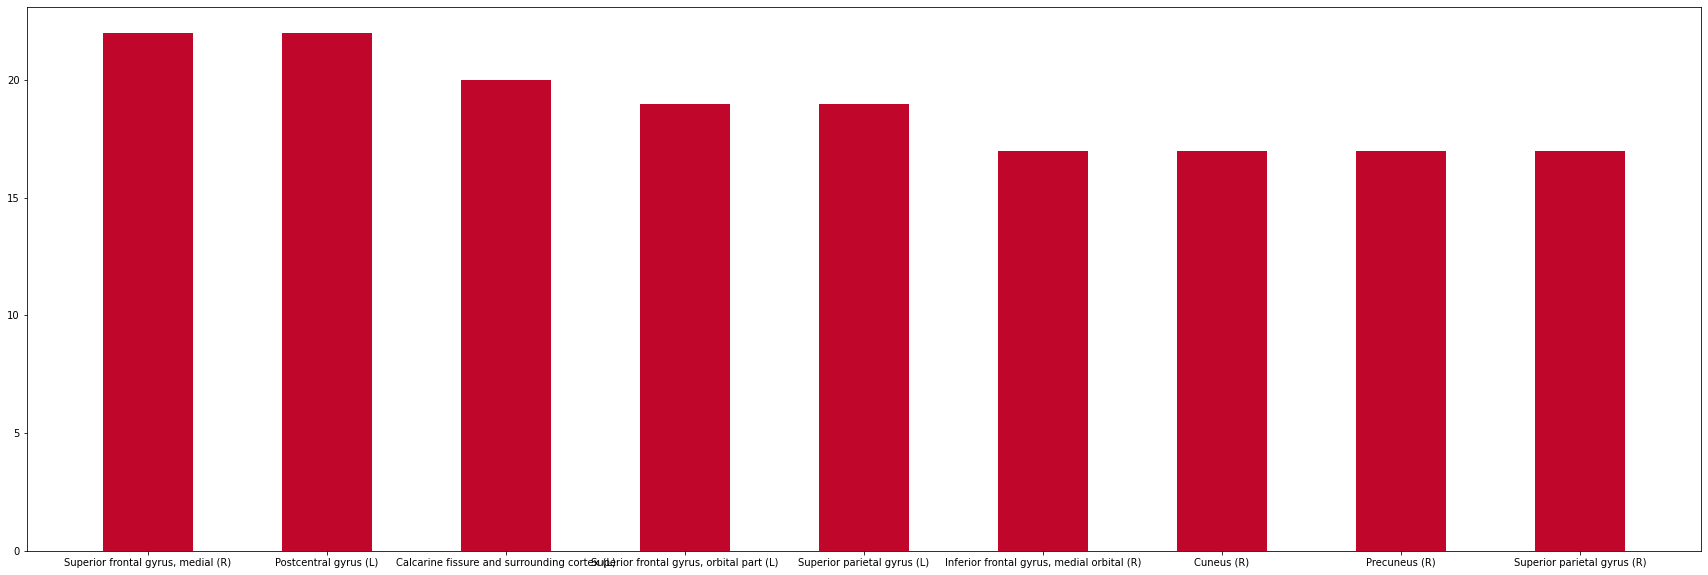

In [0]:
cd4 = sorted(final_dict.items(),key=operator.itemgetter(1),reverse=True)
cd4 = cd4[0:9]
# print(cd3)
newdict3 = {}
for i,j in cd4:
    newdict3[i]=j
# print(newdict2)

plt.figure(figsize=(30,10))
print("For all")
plt.bar(newdict3.keys(), newdict3.values(),0.5, color='#C1062B')

# Data Reduction Techniques

#TO-DO: 
1. Mean across all subjects to get 841 * 244 size matrix. 
2. Perform a dimension reduction technique and for every technique you use check how much variance is explained by explained by resulting data(A way to check how much of the whole data is still retained. )
3. Now, lets say you get 100 * 244 matrix i.e. 100 regions captures most of the information, now get all these regions from 38 subjects you have and then build appropriate model. So now your data should be of size 38 * 100 * 244, of which keep 20% for test and rest train.

In [0]:
# Flatten to apply PCA
# n = len(subject_files)
# y1 = np.ones((len(subject_files),), dtype=int)

# D = D.reshape(n, 228453 * 244)
# print(D.shape)

# print(D.shape)

In [0]:
y1 = []
for s in subject_files_mus:
  try:
    y1.append((Dict[str(s[:6])])[0])
  except:
    print(s)

In [0]:
# Conduct variance thresholding
# D_nm = thresholder.transform(D_nm)
# print(D_nm.shape)

In [0]:
#median split
y2 = []
for s in subject_files_nonmus:
  try:
    y2.append((Dict[str(s[:9])])[0])
  except:
    print(s)
y = np.concatenate((y1,y2))
median = np.median(y)
g = []
for i in y:
  if(i>median):
    g.append(1)
  else:
    g.append(0)

# y = np.array(g)
print(len(y1),len(y2),y.shape)

17 21 (38,)


In [0]:
# X = np.concatenate((D,D_nm))
parcellated = np.concatenate((data_mus,data_nonmus))
X = np.array(parcellated)
print(X.shape,y.shape)

# X = X.reshape(X.shape[0], 841 * 244)
X_mean = np.mean(X,axis=0)
# X = X[1:24]
print(X.shape,y.shape)
print(y)

(38, 117, 244) (38,)
(38, 117, 244) (38,)
[48 42 47 48 49 44 49 34 49 50 47 46 48 50 48 50 50 40 48 30 48 41 37 49
 23  0 33 33 46 43 13 43 47 49 38 36 42 42]


In [0]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score
def get_pca(X,k):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_k = pca.fit_transform(X)
    print(pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_.cumsum())
    return X_k

def get_kernel_pca(X, k,kernel='rbf', degree=3):
    """
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
    """
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree)
    X_k = kpca.fit_transform(X)
    return X_k

In [0]:
from sklearn.feature_selection import VarianceThreshold

def variance_thresholding(X_mean,thres):
  thresholder = VarianceThreshold(threshold=thres)

  # Conduct variance thresholding
  D = thresholder.fit_transform(X_mean.T)

  # X = thresholder.transform(X)

  return (D.T.shape[0])


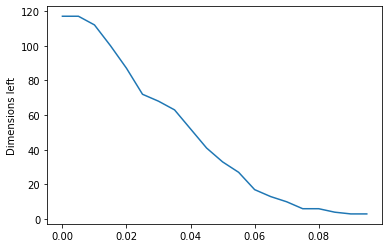

In [0]:

import numpy as np
import matplotlib.pyplot as plt

b = []
p = []
for x in np.arange(0, 0.1, 0.005):
    b.append(x)
    p.append(variance_thresholding(X_mean,x))

plt.plot(b,p)
plt.ylabel('Dimensions left')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


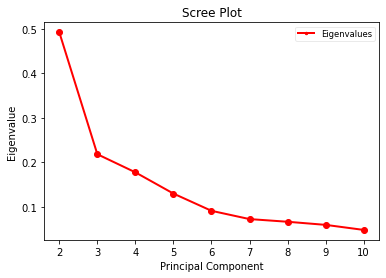

In [0]:
import matplotlib
A = X_mean
num_vars = X_mean.shape[1]
cov_mat = np.cov(A.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

fig = plt.figure()
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals[1:10], eig_vals[1:10], 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

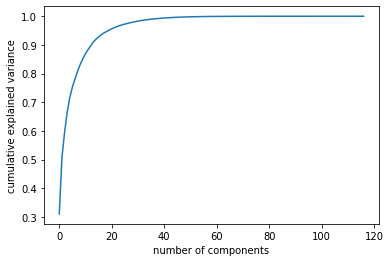

In [0]:
pca = PCA().fit(A)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# Building models

To-do task

In [0]:
print(X_mean.shape,X.shape)
k = 50
pca = PCA(n_components=k)
X_k = pca.fit_transform(X_mean.T)
X_temp = []
for x in X:
  temp = pca.transform(x.T)
  X_temp.append(temp.T)
X = np.array(X_temp)
print(X.shape)

(117, 244) (38, 117, 244)
(38, 50, 244)


In [0]:
X = X.reshape(X.shape[0],X.shape[1]*X.shape[2])
print(X.shape)

(38, 12200)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
print(X_train.shape,y_test.shape)



(30, 12200) (8,)


In [0]:
from sklearn.neural_network import MLPRegressor
print("Training MLPRegressor...")
est = MLPRegressor(hidden_layer_sizes=(10000, 10000),learning_rate_init=0.0001,early_stopping=True)
est.fit(X_train, y_train)
print("Test R2 score: {:.2f}".format(est.score(X_test, y_test)))

Training MLPRegressor...
Test R2 score: -1.97


In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test,y_test)

-1.9817497168264133

In [0]:
y = g
X = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
print(X_train.shape,y_test.shape)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# clf.predict(X_test)
clf.score(X_test,y_test)
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

(30, 12200) (8,)
Accuracy: 0.50 (+/- 0.27)


In [0]:
from sklearn.svm import LinearSVC
from sklearn import svm

clf = svm.SVC()
clf.fit(X, y)
print(clf.score(X_test,y_test))


0.875
